In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv('Data/2.02. Binary predictors.csv')

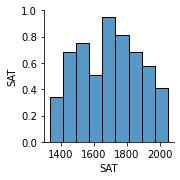

In [36]:
sns.pairplot(data)

In [37]:
#Creating dummy variables
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data

,SAT,Admitted,Gender
0,1363,0,1
1,1792,1,0
2,1954,1,0
3,1653,0,1
4,1593,0,1
...,...,...,...
163,1722,1,0
164,1750,1,1
165,1555,0,1
166,1524,0,1


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#selecting dependent and independent features
x = data[['SAT', 'Gender']]
y = data['Admitted']

In [40]:
#Splitting data
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=110)

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier()


In [43]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
pred = dtree.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[19  1]
 [ 4 27]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.96      0.87      0.92        31

    accuracy                           0.90        51
   macro avg       0.90      0.91      0.90        51
weighted avg       0.91      0.90      0.90        51



### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(200)

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [54]:
forest_pred = rf.predict(x_test)

In [56]:
print(confusion_matrix(y_test,forest_pred))
print('\n')
print(classification_report(y_test,forest_pred))

[[19  1]
 [ 2 29]]


              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.97      0.94      0.95        31

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



## Cross Validations

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(x)

StandardScaler()

In [60]:
x_scaled = scaler.transform(x)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=110)

In [62]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
predd = dtree.predict(x_test)

In [64]:
print(confusion_matrix(y_test,predd))
print('\n')
print(classification_report(y_test,predd))

[[19  1]
 [ 4 27]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.96      0.87      0.92        31

    accuracy                           0.90        51
   macro avg       0.90      0.91      0.90        51
weighted avg       0.91      0.90      0.90        51



In [65]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [67]:
pre = rf.predict(x_test)

In [68]:
print(confusion_matrix(y_test,pre))
print('\n')
print(classification_report(y_test,pre))

[[19  1]
 [ 2 29]]


              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.97      0.94      0.95        31

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51

